/Users/kyledee/Downloads/winequalityN.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab as pylab

path = '/Users/kyledee/Downloads/winequalityN.csv'
wine = pd.read_csv(path)
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine.describe()
#Check for unusual patterns and trends
# There are some nulls in the count of the database

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
wine.info()
#We can see all but one column are numerical values.
#Note that type is an object and categorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


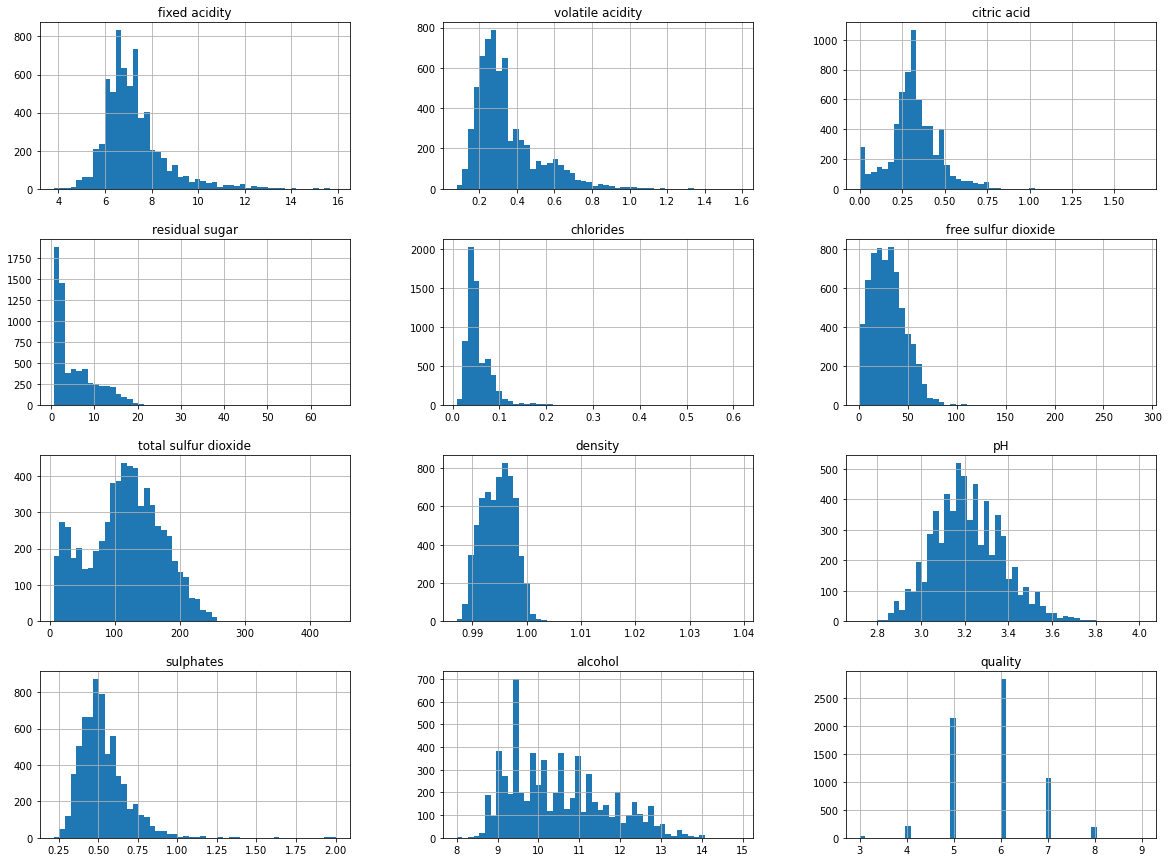

In [5]:
wine.hist(bins = 50, figsize = (20,15))
plt.show()

In [6]:
# Creating function to return plots 
# For compare and contrast between Post and Pre-normality transformatios

#Create two copies of the original dataset
import copy
wine_edit = copy.deepcopy(wine) #This will be used to prep and clean the dataset.
wine_edit_2 = copy.deepcopy(wine) #Just in case copy.


#Plot only density and QQ plot
def normality_a(data, feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

#Plots the histogram/density curve, and QQ plot
def normality_b(data, feature):
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.histplot(data[feature], bins = 50, kde = True)
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist = "norm", plot = pylab, fit=True)
    pylab.show()

#Plots only the histogram and QQ plot
def normality_c(data, feature):
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.histplot(data[feature], bins = 50)
    plt.subplot(1,2,2)
    stats.probplot(data[feature], plot = pylab)
    plt.show()


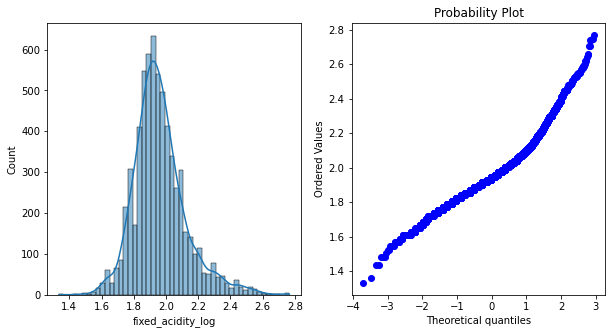

In [7]:
## Fixed Acidity

# # Non-tranformation Plot - Original
# normality_b(wine_edit,'fixed acidity')

# # Exponential transformation Plot
# wine_edit['fixed_acidity_exponential'] = wine_edit['fixed acidity']**(1/1.2)
# normality_b(wine_edit,'fixed_acidity_exponential')

# # Boxcox transformation Plot
# wine_edit['fixed_acidity_Boxcox'],parameters = stats.boxcox(wine_edit['fixed acidity'])
# normality_b(wine_edit,'fixed_acidity_Boxcox')

# # Reciprocal Transformation plot
# wine_edit['fixed_acidity_reciprocal'] = 1/wine_edit['fixed acidity']
# normality_b(wine_edit,'fixed_acidity_reciprocal')

## Square-root Transformation plot
# wine_edit['fixed_acidity_sqrt'] = np.sqrt(wine_edit['fixed acidity'])
# normality_b(wine_edit,'fixed_acidity_sqrt')

# Log Transformation Plot
wine_edit["fixed_acidity_log"] = np.log(wine_edit["fixed acidity"])
normality_b(wine_edit,'fixed_acidity_log')


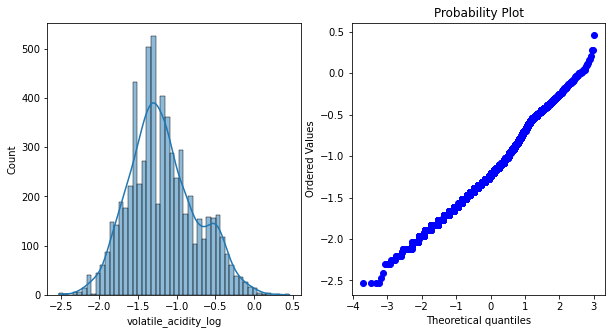

In [8]:
## Volatile Acidity

# # Non-tranformation Plot - Original
# normality_b(wine_edit,'volatile acidity')

# # Exponential transformation Plot
# wine_edit['volatile_acidity_exponential'] = wine_edit['volatile acidity']**(1/1.2)
# normality_b(wine_edit,'volatile_acidity_exponential')

# # Boxcox transformation Plot
# wine_edit['volatile_acidity_Boxcox'],parameters = stats.boxcox(wine_edit['volatile acidity'])
# normality_b(wine_edit,'volatile_acidity_Boxcox')

# # Reciprocal Transformation plot
# wine_edit['volatile_acidity_reciprocal'] = 1/wine_edit['volatile acidity']
# normality_b(wine_edit,'volatile_acidity_reciprocal')

# # Square-root Transformation plot
# wine_edit['volatile_acidity_sqrt'] = np.sqrt(wine_edit['volatile acidity'])
# normality_b(wine_edit,'volatile_acidity_sqrt')

# Log Transformation Plot
wine_edit["volatile_acidity_log"] = np.log(wine_edit["volatile acidity"])
normality_b(wine_edit,'volatile_acidity_log')

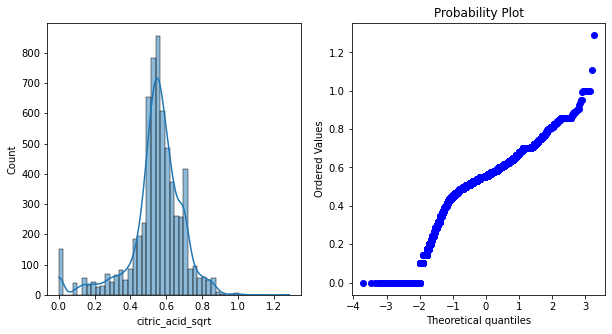

In [9]:
## Citric Acid

# # Non-tranformation Plot - Original
# normality_b(wine_edit,'citric acid')

# # Exponential transformation Plot
# wine_edit['citric_acid_exponential'] = wine_edit['citric acid']**(1/1.2)
# normality_b(wine_edit,'citric_acid_exponential')

# Boxcox transformation Plot
# wine_edit['citric_acid_Boxcox'],parameters = stats.boxcox(wine_edit['citric acid'])
# normality_b(wine_edit,'citric_acid_Boxcox')

# # Reciprocal Transformation plot
# wine_edit['citric_acid_reciprocal'] = 1/wine_edit['citric acid']
# normality_a(wine_edit,'citric_acid_reciprocal')

# Square-root Transformation plot
wine_edit['citric_acid_sqrt'] = np.sqrt(wine_edit['citric acid'])
normality_b(wine_edit,'citric_acid_sqrt')

# # Log Transformation Plot
# wine_edit["citric_acid_log"] = np.log(wine_edit["citric acid"])
# normality_b(wine_edit,'citric_acid_log')

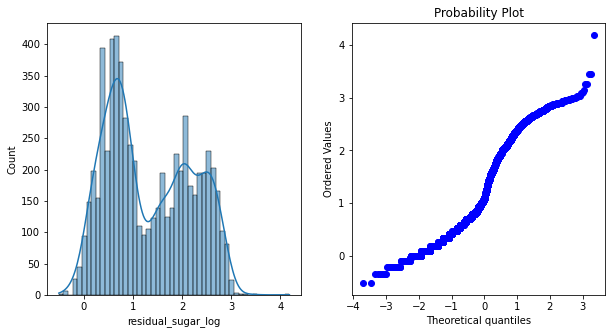

In [10]:
## Residual Sugar

# # Non-tranformation Plot - Original
# normality_b(wine_edit,'residual sugar')

# # Exponential transformation Plot
# wine_edit['residual_sugar_exponential'] = wine_edit['residual sugar']**(1/1.2)
# normality_b(wine_edit,'residual_sugar_exponential')

# # Boxcox transformation Plot
# wine_edit['residual_sugar_Boxcox'],parameters = stats.boxcox(wine_edit['residual sugar'])
# normality_b(wine_edit,'residual_sugar_Boxcox')

# # Reciprocal Transformation plot
# wine_edit['residual_sugar_reciprocal'] = 1/wine_edit['residual sugar']
# normality_b(wine_edit,'residual_sugar_reciprocal')

# # Square-root Transformation plot
# wine_edit['residual_sugar_sqrt'] = np.sqrt(wine_edit['residual sugar'])
# normality_b(wine_edit,'residual_sugar_sqrt')

# Log Transformation Plot
wine_edit["residual_sugar_log"] = np.log(wine_edit["residual sugar"])
normality_b(wine_edit,'residual_sugar_log')

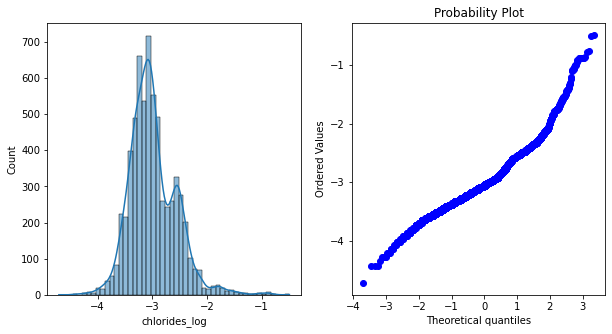

In [11]:
## Chlorides

# # Non-tranformation Plot - Original
# normality_b(wine_edit,'chlorides')

# # Exponential transformation Plot
# wine_edit['chlorides_exponential'] = wine_edit['chlorides']**(1/1.2)
# normality_b(wine_edit,'chlorides_exponential')

# # Boxcox transformation Plot
# wine_edit['chlorides_Boxcox'],parameters = stats.boxcox(wine_edit['chlorides'])
# normality_b(wine_edit,'chlorides_Boxcox')

# # Reciprocal Transformation plot
# wine_edit['chlorides_reciprocal'] = 1/wine_edit['chlorides']
# normality_b(wine_edit,'chlorides_reciprocal')

# # Square-root Transformation plot
# wine_edit['chlorides_sqrt'] = np.sqrt(wine_edit['chlorides'])
# normality_b(wine_edit,'chlorides_sqrt')

# Log Transformation Plot
wine_edit["chlorides_log"] = np.log(wine_edit["chlorides"])
normality_b(wine_edit,'chlorides_log')

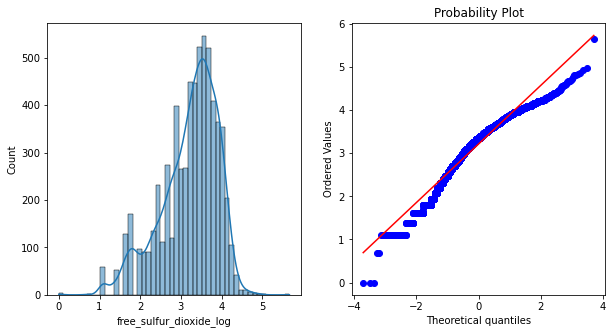

In [12]:
## Free Sulfur Dioxide

# # Non-tranformation Plot - Original
# normality_b(wine_edit,'free sulfur dioxide')

# # Exponential transformation Plot
# wine_edit['free_sulfur_dioxide_exponential'] = wine_edit['free sulfur dioxide']**(1/1.2)
# normality_b(wine_edit,'free_sulfur_dioxide_exponential')

# # Boxcox transformation Plot
# wine_edit['free_sulfur_dioxide_Boxcox'],parameters = stats.boxcox(wine_edit['free sulfur dioxide'])
# normality_b(wine_edit,'free_sulfur_dioxide_Boxcox')

# # Reciprocal Transformation plot
# wine_edit['free_sulfur_dioxide_reciprocal'] = 1/wine_edit['free sulfur dioxide']
# normality_b(wine_edit,'free_sulfur_dioxide_reciprocal')

# # Square-root Transformation plot
# wine_edit['free_sulfur_dioxide_sqrt'] = np.sqrt(wine_edit['free sulfur dioxide'])
# normality_b(wine_edit,'free_sulfur_dioxide_sqrt')

# Log Transformation Plot
wine_edit["free_sulfur_dioxide_log"] = np.log(wine_edit["free sulfur dioxide"])
normality_b(wine_edit,'free_sulfur_dioxide_log')

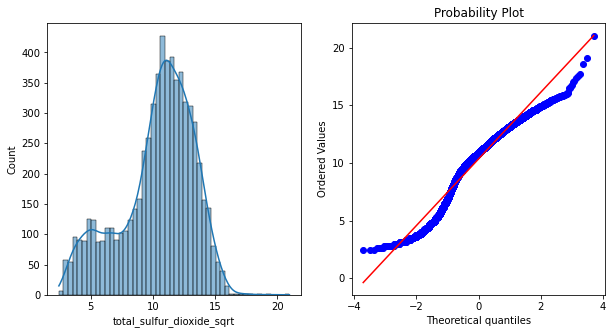

In [13]:
## Total Sulfur Dioxide

# # Non-tranformation Plot - Original
# normality_b(wine_edit,'total sulfur dioxide')

# # Exponential transformation Plot
# wine_edit['total_sulfur_dioxide_exponential'] = wine_edit['total sulfur dioxide']**(1/1.2)
# normality_b(wine_edit,'total_sulfur_dioxide_exponential')

# # Boxcox transformation Plot
# wine_edit['total_sulfur_dioxide_Boxcox'],parameters = stats.boxcox(wine_edit['total sulfur dioxide'])
# normality_b(wine_edit,'total_sulfur_dioxide_Boxcox')

# # Reciprocal Transformation plot
# wine_edit['total_sulfur_dioxide_reciprocal'] = 1/wine_edit['total sulfur dioxide']
# normality_b(wine_edit,'total_sulfur_dioxide_reciprocal')

# Square-root Transformation plot
wine_edit['total_sulfur_dioxide_sqrt'] = np.sqrt(wine_edit['total sulfur dioxide'])
normality_b(wine_edit,'total_sulfur_dioxide_sqrt')

# # Log Transformation Plot
# wine_edit["total_sulfur_dioxide_log"] = np.log(wine_edit["total sulfur dioxide"])
# normality_b(wine_edit,'total_sulfur_dioxide_log')

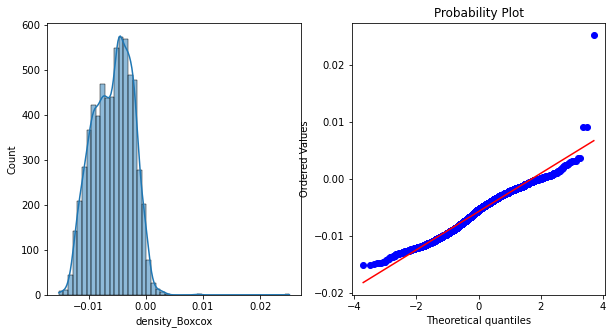

In [14]:
## Density

# # Non-tranformation Plot - Original
# normality_b(wine_edit,'density')

# # Exponential transformation Plot
# wine_edit['density_exponential'] = wine_edit['density']**(1/1.2)
# normality_b(wine_edit,'density_exponential')

# Boxcox transformation Plot
wine_edit['density_Boxcox'],parameters = stats.boxcox(wine_edit['density'])
normality_b(wine_edit,'density_Boxcox')

# # Reciprocal Transformation plot
# wine_edit['density_reciprocal'] = 1/wine_edit['density']
# normality_b(wine_edit,'density_reciprocal')

# # Square-root Transformation plot
# wine_edit['density_sqrt'] = np.sqrt(wine_edit['density'])
# normality_b(wine_edit,'density_sqrt')

# # Log Transformation Plot
# wine_edit["density_log"] = np.log(wine_edit["density"])
# normality_b(wine_edit,'density_log')

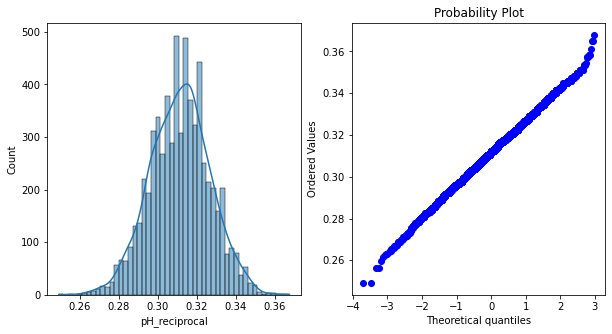

In [15]:
## pH

# # Non-tranformation Plot - Original
# normality_b(wine_edit,'pH')

# # Exponential transformation Plot
# wine_edit['pH_exponential'] = wine_edit['pH']**(1/1.2)
# normality_b(wine_edit,'pH_exponential')

# # Boxcox transformation Plot
# wine_edit['pH_Boxcox'],parameters = stats.boxcox(wine_edit['pH'])
# normality_b(wine_edit,'pH_Boxcox')

# Reciprocal Transformation plot
wine_edit['pH_reciprocal'] = 1/wine_edit['pH']
normality_b(wine_edit,'pH_reciprocal')

# # Square-root Transformation plot
# wine_edit['pH_sqrt'] = np.sqrt(wine_edit['pH'])
# normality_b(wine_edit,'pH_sqrt')

# # Log Transformation Plot
# wine_edit["pH_log"] = np.log(wine_edit["pH"])
# normality_b(wine_edit,'pH_log')

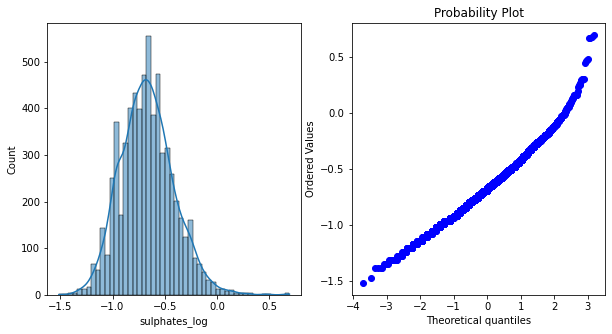

In [16]:
## sulphates

# # Non-tranformation Plot - Original
# normality_b(wine_edit,'sulphates')

# # Exponential transformation Plot
# wine_edit['sulphates_exponential'] = wine_edit['sulphates']**(1/1.2)
# normality_b(wine_edit,'sulphates_exponential')

# # Boxcox transformation Plot
# wine_edit['sulphates_Boxcox'],parameters = stats.boxcox(wine_edit['sulphates'])
# normality_b(wine_edit,'sulphates_Boxcox')

# # Reciprocal Transformation plot
# wine_edit['sulphates_reciprocal'] = 1/wine_edit['sulphates']
# normality_b(wine_edit,'sulphates_reciprocal')

# # Square-root Transformation plot
# wine_edit['sulphates_sqrt'] = np.sqrt(wine_edit['sulphates'])
# normality_b(wine_edit,'sulphates_sqrt')

# Log Transformation Plot
wine_edit["sulphates_log"] = np.log(wine_edit["sulphates"])
normality_b(wine_edit,'sulphates_log')

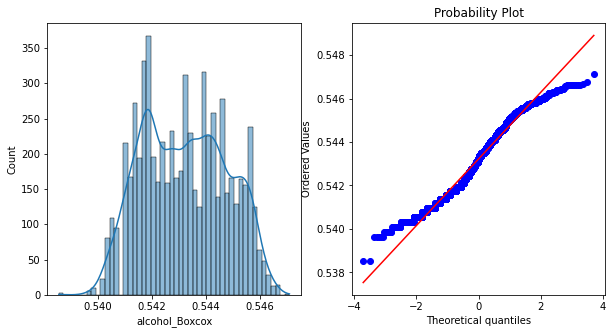

In [17]:
## pH

# # Non-tranformation Plot - Original
# normality_b(wine_edit,'alcohol')

# # Exponential transformation Plot
# wine_edit['alcohol_exponential'] = wine_edit['alcohol']**(1/1.2)
# normality_b(wine_edit,'alcohol_exponential')

# Boxcox transformation Plot
wine_edit['alcohol_Boxcox'],parameters = stats.boxcox(wine_edit['alcohol'])
normality_b(wine_edit,'alcohol_Boxcox')

# # Reciprocal Transformation plot
# wine_edit['alcohol_reciprocal'] = 1/wine_edit['alcohol']
# normality_b(wine_edit,'alcohol_reciprocal')

# # Square-root Transformation plot
# wine_edit['alcohol_sqrt'] = np.sqrt(wine_edit['alcohol'])
# normality_b(wine_edit,'alcohol_sqrt')

# # Log Transformation Plot
# wine_edit["alcohol_log"] = np.log(wine_edit["alcohol"])
# normality_b(wine_edit,'alcohol_log')

The graphical transformations above are the selected transformations of each attribute for showing to have the closest normal distribution by visual conformation.  Note, that most test for normality requires the dataset of their observations to be less than 5000 observations; therefore, the wine dataset, which has 6497 = N > 5000, exceeds most normality test.

In [18]:
list(wine_edit.columns)

['type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'fixed_acidity_log',
 'volatile_acidity_log',
 'citric_acid_sqrt',
 'residual_sugar_log',
 'chlorides_log',
 'free_sulfur_dioxide_log',
 'total_sulfur_dioxide_sqrt',
 'density_Boxcox',
 'pH_reciprocal',
 'sulphates_log',
 'alcohol_Boxcox']

In [19]:
## Semi-Final preparation and cleaning of the wine_editi verison

#Droppoing specific columns
prep_wine_edit = wine_edit.drop(['fixed acidity',
                                 'volatile acidity',
                                 'citric acid',
                                 'residual sugar',
                                 'chlorides',
                                 'free sulfur dioxide',
                                 'total sulfur dioxide',
                                 'density',
                                 'pH',
                                 'sulphates',
                                 'alcohol'],
                                  axis = 1)

#Rearranging the columns

prep_wine_edit = prep_wine_edit[['type',
                                 'fixed_acidity_log',
                                 'volatile_acidity_log',
                                 'citric_acid_sqrt',
                                 'residual_sugar_log',
                                 'chlorides_log',
                                 'free_sulfur_dioxide_log',
                                 'total_sulfur_dioxide_sqrt',
                                 'density_Boxcox',
                                 'pH_reciprocal',
                                 'sulphates_log',
                                 'alcohol_Boxcox',
                                 'quality']]
list(prep_wine_edit.columns)


['type',
 'fixed_acidity_log',
 'volatile_acidity_log',
 'citric_acid_sqrt',
 'residual_sugar_log',
 'chlorides_log',
 'free_sulfur_dioxide_log',
 'total_sulfur_dioxide_sqrt',
 'density_Boxcox',
 'pH_reciprocal',
 'sulphates_log',
 'alcohol_Boxcox',
 'quality']

In [20]:
# Comparing the Edited and Original Dataset

print('PREPARED WINE DATASET')
prep_wine_edit.info()

print("\n")
print("NON-PREPARED WINE DATASET")
wine.info()


PREPARED WINE DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   type                       6497 non-null   object 
 1   fixed_acidity_log          6487 non-null   float64
 2   volatile_acidity_log       6489 non-null   float64
 3   citric_acid_sqrt           6494 non-null   float64
 4   residual_sugar_log         6495 non-null   float64
 5   chlorides_log              6495 non-null   float64
 6   free_sulfur_dioxide_log    6497 non-null   float64
 7   total_sulfur_dioxide_sqrt  6497 non-null   float64
 8   density_Boxcox             6497 non-null   float64
 9   pH_reciprocal              6488 non-null   float64
 10  sulphates_log              6493 non-null   float64
 11  alcohol_Boxcox             6497 non-null   float64
 12  quality                    6497 non-null   int64  
dtypes: float64(11), int64(1), 

array([[<AxesSubplot:title={'center':'fixed_acidity_log'}>,
        <AxesSubplot:title={'center':'volatile_acidity_log'}>,
        <AxesSubplot:title={'center':'citric_acid_sqrt'}>],
       [<AxesSubplot:title={'center':'residual_sugar_log'}>,
        <AxesSubplot:title={'center':'chlorides_log'}>,
        <AxesSubplot:title={'center':'free_sulfur_dioxide_log'}>],
       [<AxesSubplot:title={'center':'total_sulfur_dioxide_sqrt'}>,
        <AxesSubplot:title={'center':'density_Boxcox'}>,
        <AxesSubplot:title={'center':'pH_reciprocal'}>],
       [<AxesSubplot:title={'center':'sulphates_log'}>,
        <AxesSubplot:title={'center':'alcohol_Boxcox'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

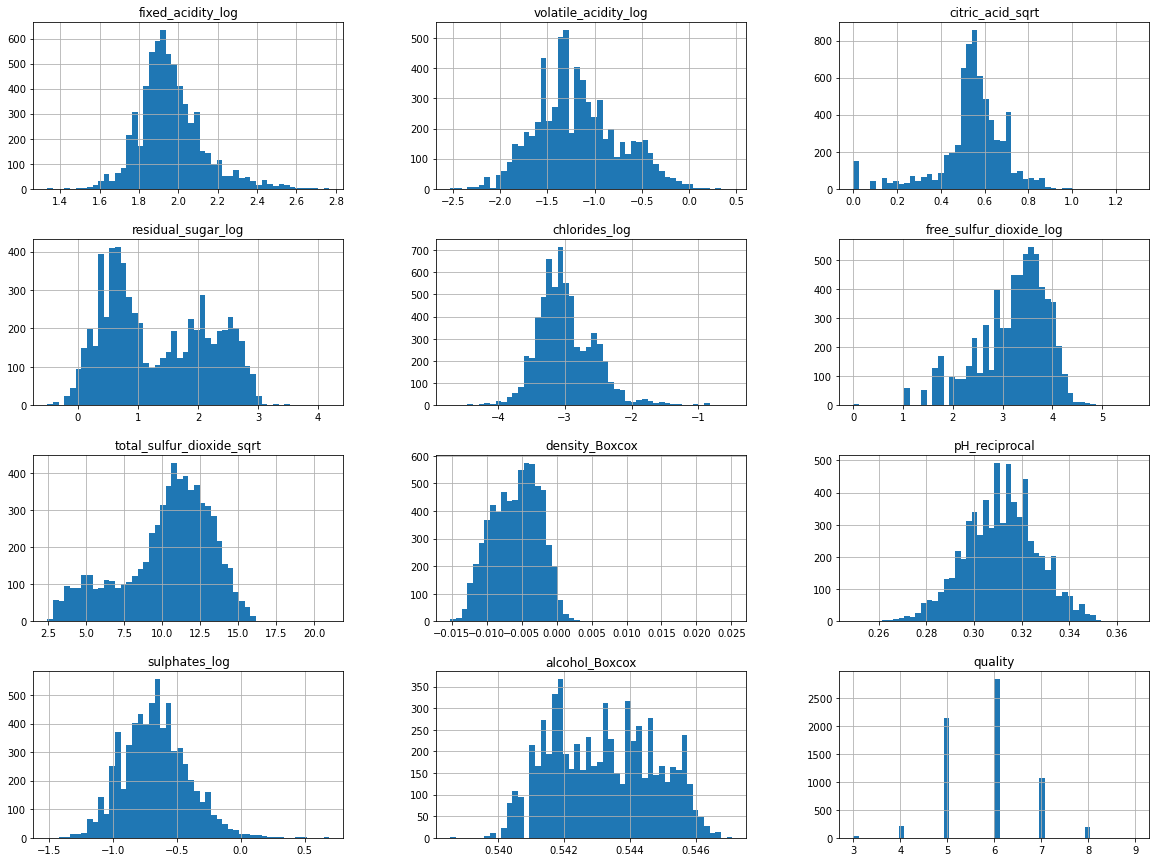

In [21]:
## Prep Wine Edit Histogram plot

prep_wine_edit.hist(bins = 50, figsize = (20,15))

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

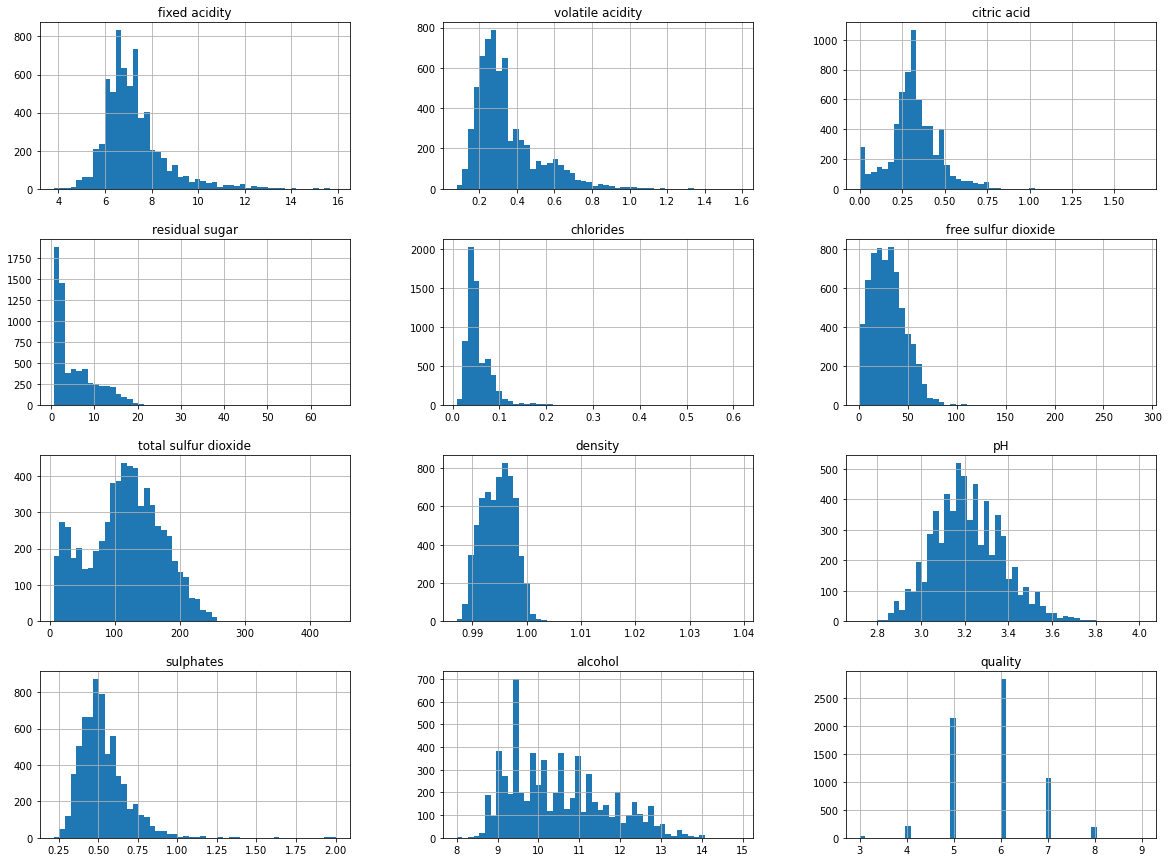

In [22]:
wine.hist(bins = 50, figsize = (20,15))

The prep_wine_edit dataset has been transformed into more of a bell shape pattern as best as it could with the following transformations:

citric.acid          > citric.acid_sqrt

residual.sugar       > residual.sugar_reciprocal

chlorides            > chlorides_log

free.sulfur.dioxide  > free.sulfur.dioxide_Boxcox 

total.sulfur.dioxide > total.sulfur.dioxide_Boxcox

sulphates            > sulphates_reciprocal

alcohol              > alcohol_log 

In [23]:
#Next we will create a test set and put it aside.

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[: test_set_size]
    train_indices = shuffled_indices[test_set_size]
    return data.iloc[train_indices], data.iloc[test_indices]

test_set, train_set = split_train_test(prep_wine_edit, 0.2)
print('Prep-training set is 80 percent and Pre-testing set is 20 percent\n')
print('Pre-training set =', len(train_set), "\nPre_testing set = ", len(test_set))



Prep-training set is 80 percent and Pre-testing set is 20 percent

Pre-training set = 1299 
Pre_testing set =  13


In [24]:
###Another way to split the data is simply train_test_split
#Very important to get the random included

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(prep_wine_edit, test_size = 0.2, random_state = 42)



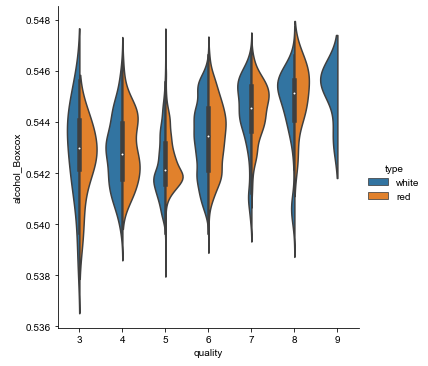

In [25]:
#We will view our data on based on quality to alcohol contained, then we will visualize the plot by type to better
#understand the density between white and red wine.


import seaborn as sns

sns.catplot(data=prep_wine_edit, kind="violin", x="quality", y="alcohol_Boxcox", hue="type", split = True)
sns.set(rc = {'figure.figsize':(25,20)})




In [26]:
## Stratified sampling based on the type of wine
#If you wish to use StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit( n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(prep_wine_edit, prep_wine_edit["quality"]):
    strat_train_set = prep_wine_edit.loc[train_index]
    strat_test_set = prep_wine_edit.loc[test_index]
    
strat_test_set["type"].value_counts()/len(strat_test_set)

#Note that red wine is two-thirds smaller in data than white wine.

## Copy the test set and be it aside.  Now we need to explore the training set.


white    0.743846
red      0.256154
Name: type, dtype: float64

In [27]:
# Looking for correction using pearson's R
corr_matrix = prep_wine_edit.corr()
corr_matrix["quality"].sort_values(ascending = False)

quality                      1.000000
alcohol_Boxcox               0.429153
citric_acid_sqrt             0.120356
free_sulfur_dioxide_log      0.113564
sulphates_log                0.027718
residual_sugar_log          -0.012836
total_sulfur_dioxide_sqrt   -0.014675
pH_reciprocal               -0.021072
fixed_acidity_log           -0.087437
volatile_acidity_log        -0.262951
chlorides_log               -0.267704
density_Boxcox              -0.315735
Name: quality, dtype: float64

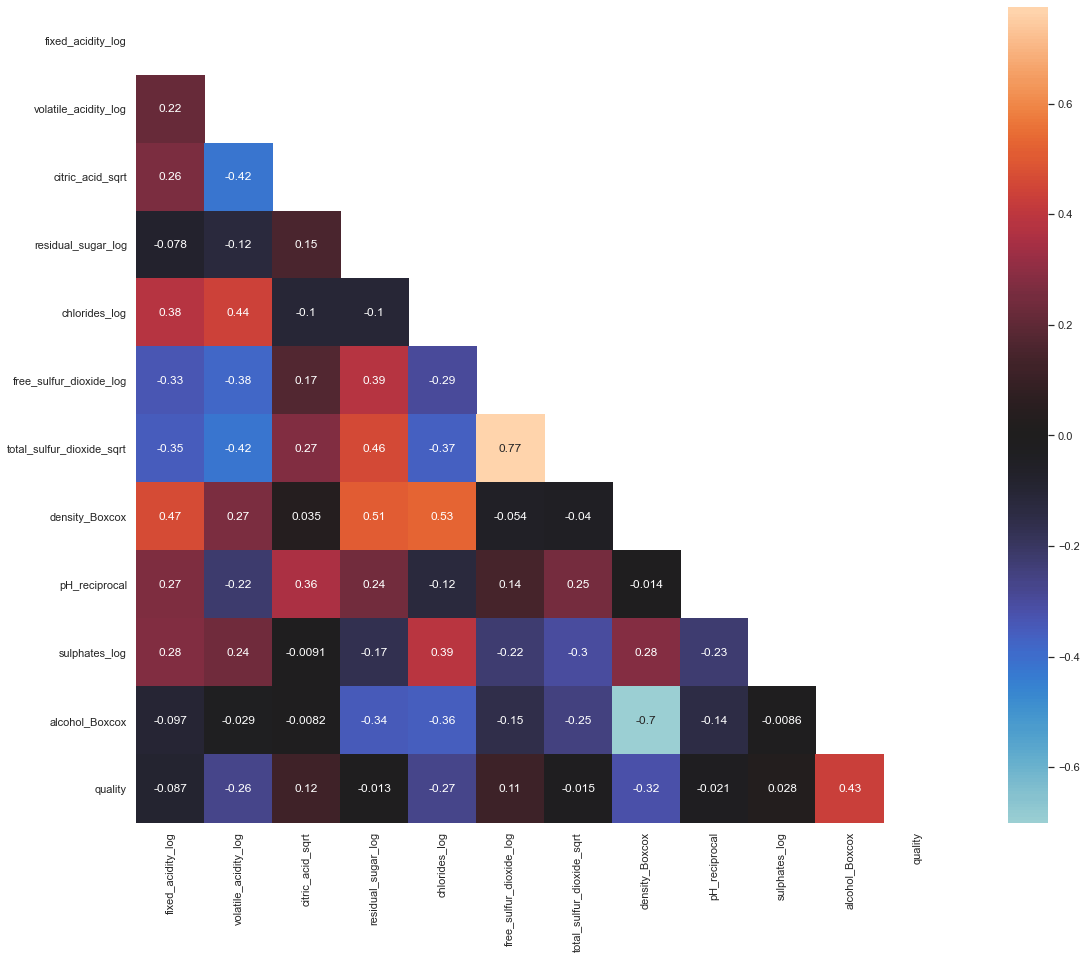

In [28]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (20,15))
    ax = sns.heatmap(corr_matrix, annot = True, mask = mask, square = True, center = 0)
    ax = sns.set(font_scale = 1.4)

In [29]:
prep_wine_edit.describe()

,fixed_acidity_log,volatile_acidity_log,citric_acid_sqrt,residual_sugar_log,chlorides_log,free_sulfur_dioxide_log,total_sulfur_dioxide_sqrt,density_Boxcox,pH_reciprocal,sulphates_log,alcohol_Boxcox,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,1.962175,-1.180208,0.543211,1.325922,-2.990468,3.216126,10.342120,-0.005794,0.311480,-0.666924,0.543219,5.818378
std,0.164271,0.439001,0.153776,0.863590,0.431117,0.698635,2.964200,0.003394,0.015383,0.257068,0.001553,0.873255
min,1.335001,-2.525729,0.000000,-0.510826,-4.710531,0.000000,2.449490,-0.015196,0.249377,-1.514128,0.538539,3.000000
25%,1.856298,-1.469676,0.500000,0.587787,-3.270169,2.833213,8.774964,-0.008437,0.301205,-0.843970,0.541934,5.000000
50%,1.945910,-1.237874,0.556776,1.098612,-3.057608,3.367296,10.862780,-0.005448,0.311526,-0.673345,0.543200,6.000000
75%,2.041220,-0.916291,0.624500,2.091864,-2.733368,3.713572,12.489996,-0.003125,0.321543,-0.510826,0.544440,6.000000
max,2.766319,0.457425,1.288410,4.186620,-0.492658,5.666427,20.976177,0.025123,0.367647,0.693147,0.547113,9.000000


In [30]:
#Preparing the data for machine learning.
prep_wine_edit = strat_train_set.drop("quality", axis = 1)
prep_wine_labels = strat_train_set["quality"].copy()

##Data Cleaning
    #Multivariate feature imputation    
    # IterativeImputer will take care of the missing values

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer( max_iter = 10, random_state = 0)

prep_wine_num = prep_wine_edit.drop("type", axis = 1)
    #We need to remove the text attribute "type" to create a copy of the numerial attributes
    
imp.fit(prep_wine_num)
IterativeImputer(random_state = 0)
    #Use trained imputer to transform the training set by replacing the missing values 
    #as a function of other features, and uses th estimate for imputation.
    
X_test = imp.transform(prep_wine_num)

prep_wine_tr = pd.DataFrame(X_test, columns = prep_wine_num.columns)
prep_wine_tr.describe()

    #The result is a plain NumPy array containing the transformed features.
    #Below displays the nulls being replaced by a learned value from the database
    #Also our dataset can be visually display using pandas DataFrame


,fixed_acidity_log,volatile_acidity_log,citric_acid_sqrt,residual_sugar_log,chlorides_log,free_sulfur_dioxide_log,total_sulfur_dioxide_sqrt,density_Boxcox,pH_reciprocal,sulphates_log,alcohol_Boxcox
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,1.962014,-1.183113,0.542687,1.331540,-2.991174,3.224646,10.351981,-0.005802,0.311577,-0.670292,0.543221
std,0.163411,0.437737,0.155529,0.864641,0.430818,0.696636,2.963037,0.003357,0.015294,0.257562,0.001557
min,1.335001,-2.525729,0.000000,-0.510826,-4.710531,0.000000,2.449490,-0.015196,0.249377,-1.469676,0.538539
25%,1.856298,-1.469676,0.500000,0.587787,-3.270169,2.833213,8.774964,-0.008400,0.301205,-0.843970,0.541934
50%,1.945910,-1.237874,0.556776,1.131402,-3.057608,3.367296,10.862780,-0.005459,0.311526,-0.673345,0.543200
75%,2.041220,-0.916291,0.624500,2.104134,-2.748872,3.737670,12.489996,-0.003157,0.321543,-0.510826,0.544440
max,2.766319,0.457425,1.288410,3.453157,-0.492658,4.987025,19.144190,0.009095,0.367647,0.693147,0.547113


In [31]:
## Handling Text and Categorical Attributes

wine_cat = prep_wine_edit[["type"]]
wine_cat.head(10)
    
    #Use OrdinalEncoder() to convert our category attributes into numerical values
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

wine_cat_encoder = ordinal_encoder.fit_transform(wine_cat)
wine_cat_encoder[:10]
    #wine_cat_encoder is not in an 1D array for this categorical attribute
    
ordinal_encoder.categories_

#Next we are going to assign the attributes to a numerical value

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
wine_cat_1hot = cat_encoder.fit_transform(wine_cat)
wine_cat_1hot
    #wine_cat_1hot is now a sparse matrix instead of a Numpy array
    

<5197x2 sparse matrix of type '<class 'numpy.float64'>'
	with 5197 stored elements in Compressed Sparse Row format>

In [32]:
##Transformation pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imp', IterativeImputer( max_iter = 10, random_state = 0)),
    ('std_scaler', StandardScaler())
])

prep_wine_num_tr = num_pipeline.fit_transform(prep_wine_num)

##The categorical columns and numerical columns have handled above and separately

from sklearn.compose import ColumnTransformer
    #ColumnTransformer works with pandas dataframes
    #ColumnTransformer is convenient in terms of single transformer able to handle all columns
    #Applies the appropriate transformations to each column.

num_attribs = list(prep_wine_num)
cat_attribs = ["type"]

full_pipeline = ColumnTransformer([
                ("num", num_pipeline,num_attribs),
                ("cat", OneHotEncoder(), cat_attribs)
])

wine_prepared = full_pipeline.fit_transform(prep_wine_edit)

wine_prepared



array([[ 1.08970366,  1.7363513 ,  1.01157254, ..., -1.06112688,
         1.        ,  0.        ],
       [-0.36663683,  0.97805528, -0.02681547, ...,  1.76095784,
         0.        ,  1.        ],
       [-1.24946482, -1.09121251, -0.33944738, ...,  0.248384  ,
         0.        ,  1.        ],
       ...,
       [ 3.64278883,  0.3045283 ,  1.01157254, ...,  1.23343773,
         1.        ,  0.        ],
       [-0.55210985, -0.55747387,  0.52608335, ..., -1.18387718,
         0.        ,  1.        ],
       [-0.64699766,  1.37834316, -0.99919402, ...,  0.16360317,
         1.        ,  0.        ]])

In [33]:
#Create Linear Regression Model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_prepared, prep_wine_labels)

#Execute the training set and check the predictions
#Note: prep_wine_lables are "quality"

some_data = prep_wine_edit.iloc[:5]
some_labels = prep_wine_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("\n")
print("Labels:", list(some_labels))


Predictions: [5.38826157 6.40442979 5.95555355 5.50054453 6.32022422]


Labels: [5, 7, 5, 6, 5]


The linear Regression Model creates predictions that are not exactly accurate. Below we will use a regression model's Root Mean Squared Error (RMSE) on the whole training set.

In [34]:
## RMSE - Scikit-Learn's mean_squared_error:
from sklearn.metrics import mean_squared_error
wine_predictions = lin_reg.predict(wine_prepared)
lin_mse = mean_squared_error(prep_wine_labels, wine_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

#The lin_rmse is 0.725, which isn't terrible.  However we will use other models to 
#determine our result.  We could be overfitting our model.


0.7247220815946964

In [35]:
#DecisionTreeRegressor Model:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_prepared, prep_wine_labels)


Some_Data = prep_wine_edit.iloc[:5]
Some_Labels = prep_wine_labels.iloc[:5]
Some_Data_prepared = full_pipeline.transform(Some_Data)


print("DecisionTreeRegressor Predictions:", tree_reg.predict(Some_Data_prepared))
print("Inital Labels:", list(Some_Labels))

#The predictions are pretty spot on. Now we need to evaluate the tree_reg's rmse
tree_wine_predictions = tree_reg.predict(wine_prepared)
tree_mse = mean_squared_error(prep_wine_labels, tree_wine_predictions)
tree_rmse = np.sqrt(tree_mse)

print("DecisionTreeRegressor RSME:", tree_rmse)

#According to the DecisionTreeRegressor RSME we have a result of 0.  
#This model could be greatly overfitting our model.  


DecisionTreeRegressor Predictions: [5. 7. 5. 6. 5.]
Inital Labels: [5, 7, 5, 6, 5]
DecisionTreeRegressor RSME: 0.0


In [36]:
#RandomForestRegressor Model:

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(wine_prepared, prep_wine_labels)

# #Predictions
forest_reg_predictions = forest_reg.predict( wine_prepared)
forest_reg_mse = mean_squared_error(prep_wine_labels, forest_reg_predictions)
forest_reg_rmse = np.sqrt( forest_reg_mse)

# # visualize some data
print("RandomForestRegressor Predictions:", forest_reg.predict(Some_Data_prepared))
print("Inital Labels:", list(Some_Labels))
print("RandomForestRegressor RSME:", forest_reg_rmse)




RandomForestRegressor Predictions: [5.01 6.96 5.5  6.12 5.4 ]
Inital Labels: [5, 7, 5, 6, 5]
RandomForestRegressor RSME: 0.22679947683771637


In [37]:
#Cross-Validation Evaluation
    #Use Scikit-Learn's K-fold cross-validation feature
    #Decision Tree Regressor
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, wine_prepared, prep_wine_labels,
                        scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores, feature):
    print("The Cross-Validation Evaluation for:", feature, "\n")
    print("Scores:", scores, "\n")
    print("Mean:", scores.mean(), "\n")
    print("Standard Deviation:", scores.std())

display_scores(tree_rmse_scores, "tree_rmse_scores")

#The Decision Tree Regressor shows that scores performing worst than the Linear Regression Model
#The cross-validation measured the standard deviation as 0.024.  Therefore the Decision Tree Regression
#has a score of approximately 0.85 + or - 0.024
    
#_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

    #Linear Regression
     #Use Scikit-Learn's K-fold cross-validation feature
lin_scores = cross_val_score(lin_reg, wine_prepared, prep_wine_labels,
                             scoring = "neg_mean_squared_error", cv = 10)
lin_rsme_scores = np.sqrt( - lin_scores )
print('\n')
display_scores( lin_scores, "lin_scores")
    
    
#_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

    #RandomForestRegressor
forest_scores = cross_val_score(forest_reg, wine_prepared, prep_wine_labels,
                                scoring = "neg_mean_squared_error", cv = 10)
forest_rsme_scores = np.sqrt( - forest_scores)
print("\n")
display_scores( forest_scores, "forest_scores")



The Cross-Validation Evaluation for: tree_rmse_scores 

Scores: [0.83205029 0.8378085  0.83089387 0.88361147 0.8192398  0.79056942
 0.87045523 0.89205441 0.85567357 0.8305348 ] 

Mean: 0.8442891357624592 

Standard Deviation: 0.029522395706845204


The Cross-Validation Evaluation for: lin_scores 

Scores: [-0.54747205 -0.51616752 -0.50049065 -0.55932845 -0.55871559 -0.48920406
 -0.48525671 -0.5602021  -0.4819947  -0.57697336] 

Mean: -0.5275805191756873 

Standard Deviation: 0.03476069525838786


The Cross-Validation Evaluation for: forest_scores 

Scores: [-0.38865231 -0.36912654 -0.37309231 -0.41765846 -0.3932525  -0.33369269
 -0.35138981 -0.43712987 -0.35733237 -0.38038362] 

Mean: -0.3801710472802727 

Standard Deviation: 0.029283112325345813


The standard deviation for the linear regression model is worst than the decision tree regessor.  Plus, our second model seems to be performing better than our first model during our cross validation test. 

In [38]:
#Grid Search to determine parameter

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], "max_features": [ 2, 4, 6, 8 ]},
    {'bootstrap': [ False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    
]

#RandomForestRegressor()
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, 
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)


grid_search.fit(wine_prepared, prep_wine_labels)






GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
grid_search.best_params_
# Only 6 and 30 are the maximum values that were evaluated.

{'max_features': 4, 'n_estimators': 30}

In [40]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [41]:
#Evaluation of the Scores
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(np.sqrt(-mean_score), params)



0.7300642842594219 {'max_features': 2, 'n_estimators': 3}
0.6479725814807143 {'max_features': 2, 'n_estimators': 10}
0.6288282054582129 {'max_features': 2, 'n_estimators': 30}
0.7253017141895975 {'max_features': 4, 'n_estimators': 3}
0.653208701476721 {'max_features': 4, 'n_estimators': 10}
0.6233591616514753 {'max_features': 4, 'n_estimators': 30}
0.7347043060405177 {'max_features': 6, 'n_estimators': 3}
0.649339113367553 {'max_features': 6, 'n_estimators': 10}
0.6275911721820221 {'max_features': 6, 'n_estimators': 30}
0.7193149771437373 {'max_features': 8, 'n_estimators': 3}
0.6557089093200985 {'max_features': 8, 'n_estimators': 10}
0.6295352845470782 {'max_features': 8, 'n_estimators': 30}
0.7024555434065265 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.6347227909854136 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.7048677993393827 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.6383129135910276 {'bootstrap': False, 'max_features': 3, 'n_e

In [42]:
##Randomized Search
feature_importance = grid_search.best_estimator_.feature_importances_
print(feature_importance)



[0.06195983 0.10597912 0.07395588 0.07563466 0.07694386 0.08831671
 0.07517789 0.10684185 0.06559623 0.07092805 0.19331978 0.00227863
 0.00306751]


In [70]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("quality", axis = 1)
y_test = strat_test_set["quality"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

print("Final Root Mean Squared Error: %0.2f" % final_rmse)

#_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
cf_interval = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

print("The Confidence Interval:", cf_interval)

Final Root Mean Squared Error: 0.61
The Confidence Interval: [0.57051745 0.64501806]


Above is the 95 percent confidence interval (CI) for the final root mean squared error (final_rmse).  The 95 percent confidence interval indicates that the wine quality's rmse will approximately be between the lower boundary of 0.57 and an upper boundary of 0.65. 

In [69]:
predicted_df = {'predicted_wine_quality': final_predictions, 'original_wine_quality': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_wine_quality,original_wine_quality
6338,6.833333,7
3921,5.400000,5
2051,5.033333,5
2059,5.166667,5
4557,5.166667,6
4824,5.300000,5
5483,5.700000,6
6189,5.833333,6
5318,6.100000,7
849,6.500000,6
